Ekstrasi Fitur LBP

In [6]:
import cv2 # OpenCV
import numpy as np # NumPy
from matplotlib import pyplot as plt # Matplotlib

In [7]:
def get_pixel(img, center, x, y):
    # Fungsi untuk mendapatkan nilai piksel baru
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    '''
    Format :
    64 | 128 | 1
    ----------------
    32 | 0 | 2
    ----------------
    16 | 8 | 4
    '''
    center = img[x][y]
    val_ar = []
    
    # Mengambil nilai piksel pada posisi-posisi tertentu sesuai format LBP
    val_ar.append(get_pixel(img, center, x-1, y+1)) # top_right
    val_ar.append(get_pixel(img, center, x, y+1)) # right
    val_ar.append(get_pixel(img, center, x+1, y+1)) # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y)) # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1)) # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1)) # left
    val_ar.append(get_pixel(img, center, x-1, y-1)) # top_left
    val_ar.append(get_pixel(img, center, x-1, y)) # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    
    # Menghitung nilai LBP berdasarkan nilai piksel sekitar
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

In [8]:
def show_output(output_list):
    # Mendapatkan panjang output_list
    output_list_len = len(output_list)
    
    # Membuat figure dengan ukuran dan layout sesuai dengan jumlah elemen di output_list
    figure = plt.figure(figsize=(20, 6))
    
    # Iterasi melalui setiap elemen di output_list
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]  # Mengambil citra dari current_dict
        current_xlabel = current_dict["xlabel"]  # Mengambil label sumbu x dari current_dict
        current_ylabel = current_dict["ylabel"]  # Mengambil label sumbu y dari current_dict
        current_xtick = current_dict["xtick"]  # Mengambil nilai xtick dari current_dict
        current_ytick = current_dict["ytick"]  # Mengambil nilai ytick dari current_dict
        current_title = current_dict["title"]  # Mengambil judul dari current_dict
        current_type = current_dict["type"]  # Mengambil jenis tipe (gray, histogram, normal) dari current_dict
        
        # Menambahkan subplot ke dalam figure
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        
        # Cek jenis tipe citra dan lakukan tindakan yang sesuai
        if current_type == "gray":
            # Menampilkan citra grayscale
            current_plot.imshow(current_img, cmap=plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            # Menampilkan histogram
            current_plot.plot(current_img, color="black")
            current_plot.set_xlim([0, 260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list, rotation=90)
        elif current_type == "normal":
            # Menampilkan citra normal
            current_plot.imshow(current_img)
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
    
    # Menampilkan figure
    plt.show()

C:\Users\Rizki M. Syarif\AppData\Local\Temp\ipykernel_5764\1412078536.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list, rotation=90)


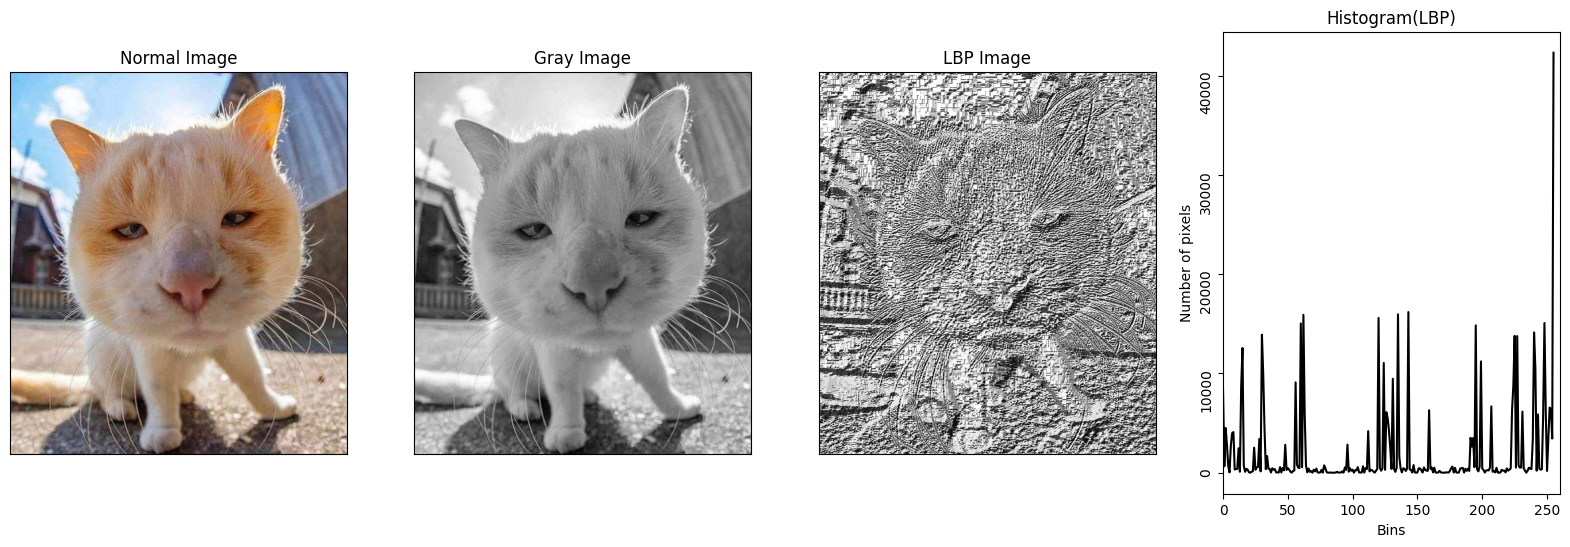

LBP Program selesai 


In [9]:
image_file = 'Kucing Oyen.jpeg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Membuat citra LBP kosong dengan ukuran yang sama dengan citra grayscale
img_lbp = np.zeros((height, width, 3), np.uint8)

# Menghitung nilai LBP untuk setiap piksel di citra grayscale
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

# Menghitung histogram LBP
hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])

# Membuat daftar output untuk ditampilkan
output_list = []
output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                    })
output_list.append({"img": img_gray,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                    })
output_list.append({"img": img_lbp,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LBP Image",
                    "type": "gray"
                    })
output_list.append({"img": hist_lbp,
                    "xlabel": "Bins",
                    "ylabel": "Number of pixels",
                    "xtick": None,
                    "ytick": None,
                    "title": "Histogram(LBP)",
                    "type": "histogram"
                    })

# Menampilkan output
show_output(output_list)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("LBP Program selesai")

C:\Users\Rizki M. Syarif\AppData\Local\Temp\ipykernel_5764\1412078536.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list, rotation=90)


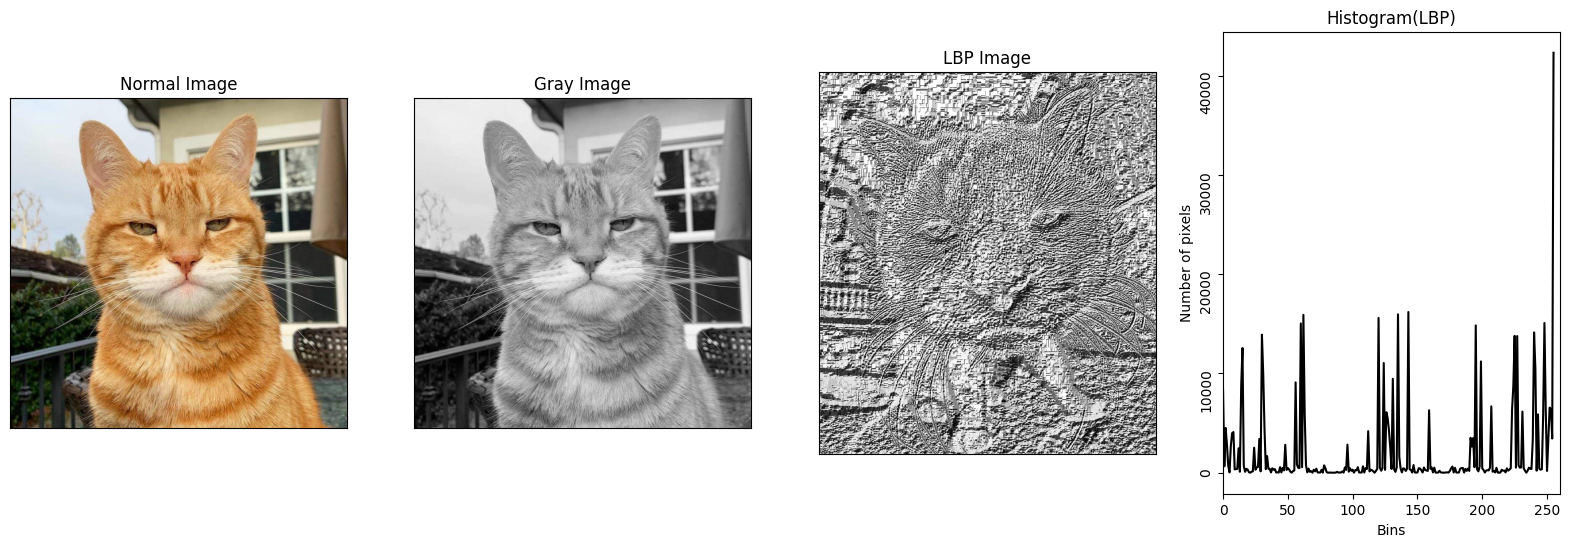

LBP Program selesai


In [11]:
def brighter(nilai, img):
    img_b = np.zeros((height, width, 3), np.uint8)
    for y in range(0, height):
        for x in range(0, width):
            red = img[y][x][2] + nilai
            green = img[y][x][1] + nilai
            blue = img[y][x][0] + nilai
            if red > 255:
                red = 255
            if red < 0:
                red = 0
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0
            img_b[y][x] = (red, green, blue)
    return img_b

image_file = 'Oyen.jpeg'
image_file2 = 'Kucing Oyen.jpeg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Menggunakan fungsi brighter untuk menghasilkan citra yang lebih terang
img_gray2 = cv2.cvtColor(brighter(50, img_bgr), cv2.COLOR_BGR2GRAY)

img_bgr2 = cv2.imread(image_file2)
height2, width2, channel2 = img_bgr2.shape
img_gray3 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

# Fungsi lbp tidak mengembalikan nilai apa pun
def lbp(img_gray, height, width, img_bgr):
    img_lbp = np.zeros((height, width, 3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

# Menghitung histogram LBP setelah pemanggilan fungsi lbp
hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])

# Membuat daftar output dan menampilkan citra dan histogram
output_list = []
output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                    })
output_list.append({"img": img_gray,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                    })
output_list.append({"img": img_lbp,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LBP Image",
                    "type": "gray"
                    })
output_list.append({"img": hist_lbp,
                    "xlabel": "Bins",
                    "ylabel": "Number of pixels",
                    "xtick": None,
                    "ytick": None,
                    "title": "Histogram(LBP)",
                    "type": "histogram"
                    })
show_output(output_list)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("LBP Program selesai")

# Memanggil fungsi lbp untuk citra lainnya
lbp(img_gray, height, width, img_bgr)
lbp(img_gray2, height, width, img_bgr)
lbp(img_gray3, height2, width2, img_bgr2)
